# EDA on King County Housing dataset

### Dataset contains house descriptions like zipcode, building year, number of bathrooms, size, etc. together with price

In [ ]:
# https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [37]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load data

In [146]:
df_houses = pd.read_csv("data/King_County_House_prices_dataset.csv")

## Looking at the data

In [147]:
df_houses.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id.1'],
      dtype='object')

In [148]:
df_houses.shape

(21597, 23)

In [149]:
df_houses.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [150]:
df_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [151]:
# check for double rows -> no double rows
df_houses.duplicated().value_counts()

False    21597
Name: count, dtype: int64

<Axes: >

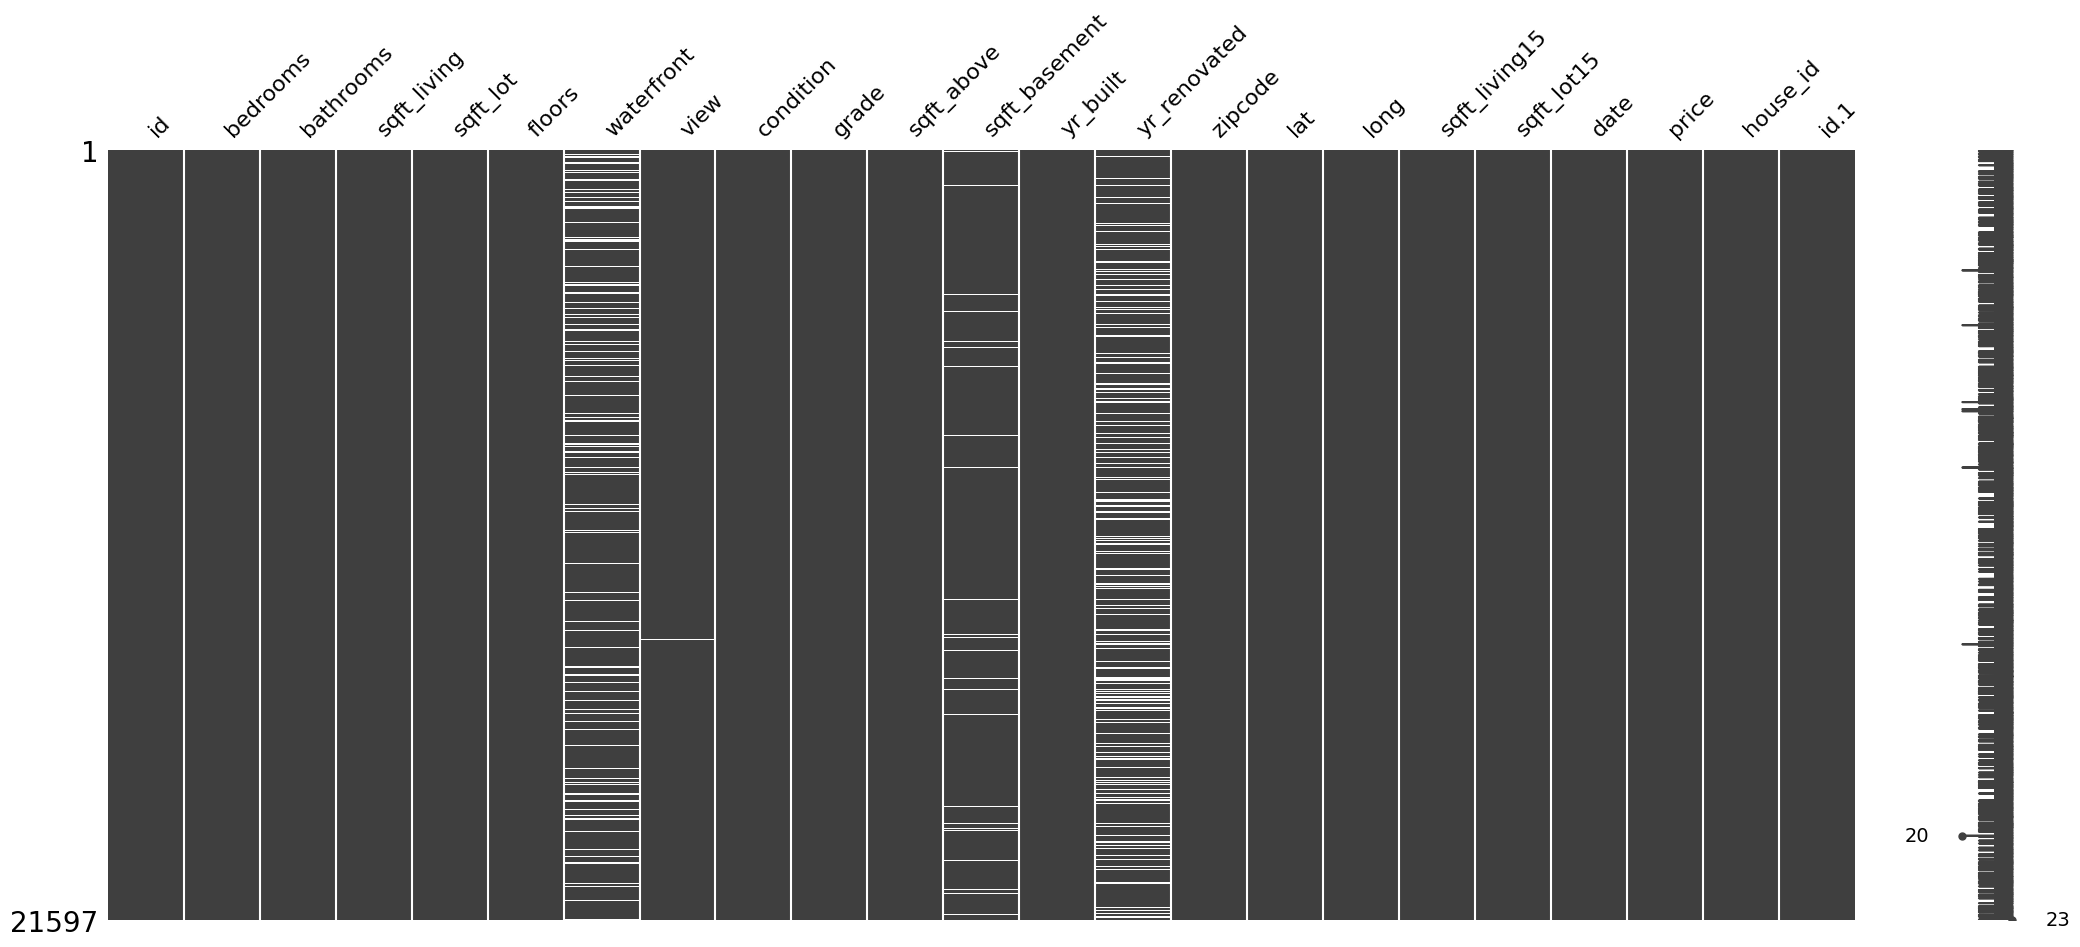

In [155]:
# show regions in dataset with missing values
msno.matrix(df_houses)

In [156]:
# count nans per column
df_houses.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

In [ ]:
# Some columns contain nan-values. We will only use column yr_renovated and will take care of the nan values later.

## Data Cleaning

#### 1. Drop not needed id columns

In [157]:
df_houses[["id", "house_id", "id.1"]].head()

,id,house_id,id.1
0,7129300520,7129300520,1
1,6414100192,6414100192,2
2,5631500400,5631500400,3
3,2487200875,2487200875,4
4,1954400510,1954400510,5


In [158]:
df_houses.drop(columns=["id", "id.1"], inplace=True)

#### 2. Adjust dtype of date column

In [159]:
# date column seems to have more than one dtype
df_houses.dtypes

bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
dtype: object

In [160]:
# change "date" dtype to datetime
df_houses['date'] = pd.to_datetime(df_houses['date'], format='%Y-%m-%d')

In [161]:
df_houses.dtypes

bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
date             datetime64[ns]
price                   float64
house_id                  int64
dtype: object

#### 3. Adjust dtype of column yr_renovated

In [162]:
# dtype of yr_renovated is float but should be int

In [163]:
df_houses["yr_renovated"].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [164]:
# convert float to inf and replace nan with zero (zero values will be handled later)
df_houses["yr_renovated"] = df_houses["yr_renovated"].fillna(0.0).astype(int)

In [165]:
df_houses["yr_renovated"].unique()

array([    0, 19910, 20020, 20100, 19920, 20130, 19940, 19780, 20050,
       20030, 19840, 19540, 20140, 20110, 19830, 19450, 19900, 19880,
       19770, 19810, 19950, 20000, 19990, 19980, 19700, 19890, 20040,
       19860, 20070, 19870, 20060, 19850, 20010, 19800, 19710, 19790,
       19970, 19500, 19690, 19480, 20090, 20150, 19740, 20080, 19680,
       20120, 19630, 19510, 19620, 19530, 19930, 19960, 19550, 19820,
       19560, 19400, 19760, 19460, 19750, 19640, 19730, 19570, 19590,
       19600, 19670, 19650, 19340, 19720, 19440, 19580])

In [166]:
# convert int to str in order to remove zeros at the end
df_houses["yr_renovated"] = df_houses["yr_renovated"].astype(str)

# remove last character of each cell
df_houses["yr_renovated"] = df_houses["yr_renovated"].str[:-1] 

# replace empty strings with 0
df_houses["yr_renovated"] = df_houses["yr_renovated"].replace("", "0")    

# convert dtype string to int
df_houses["yr_renovated"] = df_houses["yr_renovated"].astype(int)

In [167]:
df_houses["yr_renovated"].unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

In [168]:
df_houses.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
0,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,...,1955,0,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520
1,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,...,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
2,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,...,1933,0,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400
3,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,...,1965,0,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875
4,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,...,1987,0,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510


## Looking for correlations

### Pick potentially interesting columns

In [170]:
df_interesting = df_houses[["price", "grade", "condition", "yr_built", "bedrooms", "bathrooms", 
                     "sqft_living", "sqft_lot", "floors", "sqft_living15", "sqft_lot15", "sqft_above"]]

In [198]:
df_interesting.head()

,price,grade,condition,yr_built,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_living15,sqft_lot15,sqft_above
0,221900.000,7,3,1955,3.000,1.000,1180.000,5650.000,1.000,1340.000,5650.000,1180.000
1,538000.000,7,3,1951,3.000,2.250,2570.000,7242.000,2.000,1690.000,7639.000,2170.000
2,180000.000,6,3,1933,2.000,1.000,770.000,10000.000,1.000,2720.000,8062.000,770.000
3,604000.000,7,5,1965,4.000,3.000,1960.000,5000.000,1.000,1360.000,5000.000,1050.000
4,510000.000,8,3,1987,3.000,2.000,1680.000,8080.000,1.000,1800.000,7503.000,1680.000


In [171]:
corr = df_interesting.corr()

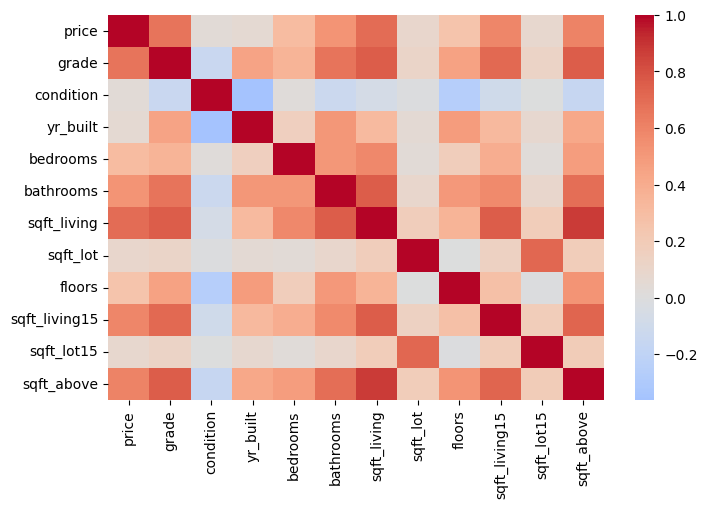

In [173]:
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.show()

### We see high correlations between variables 
* price and sqft_living15:
  * the better the standard of living of the neighborhood, the higher the price
* price and grade:
  * the better the reputation of the house, the higher the price
* price and sqft_above/sqft_living:
  * the bigger the house, the higher the price

#### Correlation between price and sqft_living15:

In [35]:
# sqft_living15 = The square footage of interior housing living space for the nearest 15 neighbors

In [50]:
corr_coeff = df_houses["sqft_living15"].corr(df_houses["price"])
print(f"correlation coefficient: {np.round(corr_coeff,2)}")

correlation coefficient: 0.59


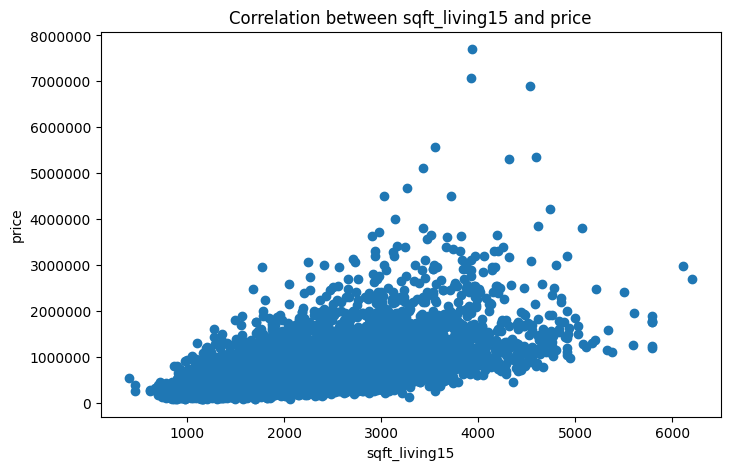

In [177]:
plt.scatter(df_houses["sqft_living15"], df_houses["price"])
plt.xlabel("sqft_living15")
plt.ylabel("price")
plt.title("Correlation between sqft_living15 and price")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)    # suppress scientific notation
plt.show()

#### Correlation between price and grade

In [ ]:
# grade: overall grade given to the housing unit, based on King County grading system

In [52]:
corr_coeff = df_houses["price"].corr(df_houses["grade"])
print(f"correlation coefficient: {np.round(corr_coeff,2)}")

correlation coefficient: 0.67


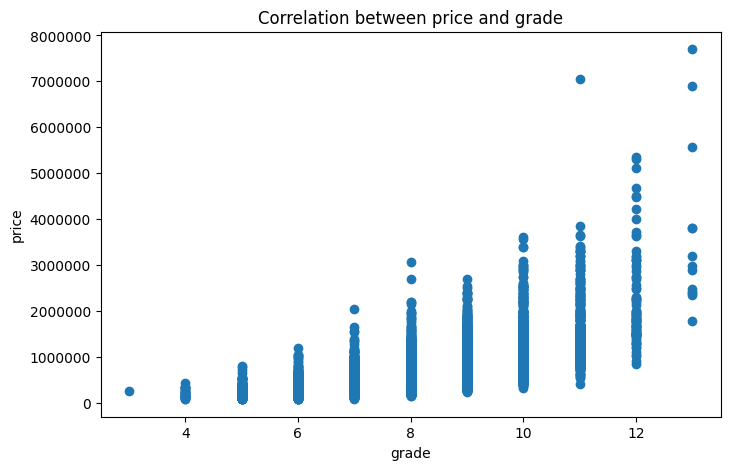

In [175]:
plt.scatter(df_houses["grade"], df_houses["price"])
plt.xlabel("grade")
plt.ylabel("price")
plt.title("Correlation between price and grade")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)    # suppress scientific notation
plt.show()

#### Correlation between price and size of house

In [58]:
corr_coeff = df_houses["price"].corr(df_houses["sqft_living"])
print(f"correlation coefficient: {np.round(corr_coeff,2)}")

correlation coefficient: 0.7


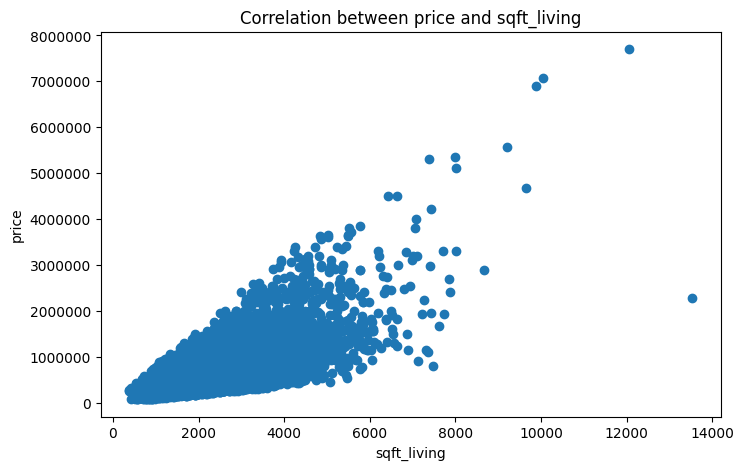

In [176]:
plt.scatter(df_houses["sqft_living"], df_houses["price"])
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title("Correlation between price and sqft_living")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)    # suppress scientific notation
plt.show()

## Looking at renovation year: Let's see if there are any interesting new correlations

#### Most of the entries in yr_renovated column are not valid:

In [180]:
# number of zeros
print((df_houses.yr_renovated == 0).sum())

20853


#### Exclude these rows:

In [181]:
df_houses_valid_renovated = df_houses.query("yr_renovated != 0")
#df_houses_valid_renovated = df_houses.query("yr_renovated != 0 and not yr_renovated.isnull()")

#### 744 rows left:

In [182]:
df_houses_valid_renovated.shape

(744, 21)

#### Now it looks good:

In [183]:
df_houses_valid_renovated["yr_renovated"].unique()

array([1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984, 1954,
       2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000, 1999,
       1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001, 1980,
       1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008, 1968,
       2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956, 1940,
       1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965, 1934,
       1972, 1944, 1958])

In [184]:
df_houses_valid_renovated["yr_renovated"].value_counts()

yr_renovated
2014    73
2013    31
2003    31
2007    30
2000    29
        ..
1951     1
1953     1
1946     1
1976     1
1948     1
Name: count, Length: 69, dtype: int64

In [185]:
df_houses_valid_renovated.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id
1,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,...,1951,1991,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192
35,3.000,2.500,2300.000,3060.000,1.500,0.000,0.000,3,8,1510.000,...,1930,2002,98115,47.683,-122.310,1590.000,3264.000,2014-06-13,696000.000,9547205180
95,4.000,2.500,3300.000,10250.000,1.000,0.000,0.000,3,7,2390.000,...,1946,1991,98040,47.587,-122.249,1950.000,6045.000,2014-09-08,905000.000,1483300570
103,3.000,2.500,2920.000,8113.000,2.000,0.000,0.000,3,8,2920.000,...,1950,2010,98004,47.581,-122.196,2370.000,8113.000,2014-10-07,1090000.000,2450000295
125,4.000,2.750,2750.000,17789.000,1.500,0.000,0.000,3,8,1980.000,...,1914,1992,98004,47.614,-122.212,3060.000,11275.000,2015-03-02,1450000.000,4389200955


#### Potentially interesting columns:

In [187]:
df_renovated_interesting = df_houses_valid_renovated[["price", "grade", "condition", "yr_built", "yr_renovated", "bedrooms", "bathrooms", 
                     "sqft_living", "sqft_lot", "floors", "sqft_living15", "sqft_lot15", "sqft_above"]]

In [188]:
corr_renovated = df_renovated_interesting.corr()

<Axes: >

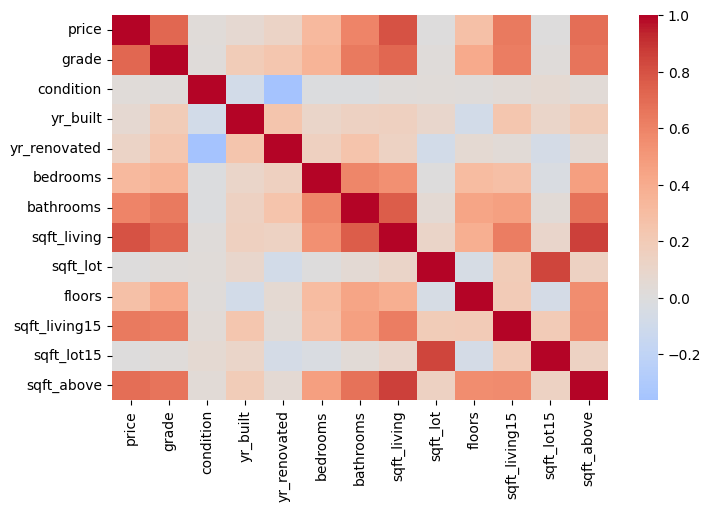

In [189]:
sns.heatmap(corr_renovated, cmap='coolwarm', center=0)

#### Looking at yr_renovated, there is only a slight negative correlation with condition column

In [194]:
corr_coeff = df_houses_valid_renovated["yr_renovated"].corr(df_houses_valid_renovated["condition"], method="spearman")
print(f"correlation_coefficient: {np.round(corr_coeff,2)}")

correlation_coefficient: -0.38


### Number of houses per building year (cumulative)

In [201]:
years = ["1910", "1920", "1930", "1940", "1950", "1960", "1970", "1980", "1990", "2000"]

In [202]:
num_of_houses = []
for year in years:
    df_houses_historical = df_houses.query(f"yr_built <= {year}")
    num_of_houses.append(len(df_houses_historical))
num_of_houses

[779, 1548, 2732, 3328, 5184, 7633, 10175, 12568, 14926, 17059]

In [203]:
years_adjusted_for_plot = [f"<={year}" for year in years]
years_adjusted_for_plot

['<=1910',
 '<=1920',
 '<=1930',
 '<=1940',
 '<=1950',
 '<=1960',
 '<=1970',
 '<=1980',
 '<=1990',
 '<=2000']

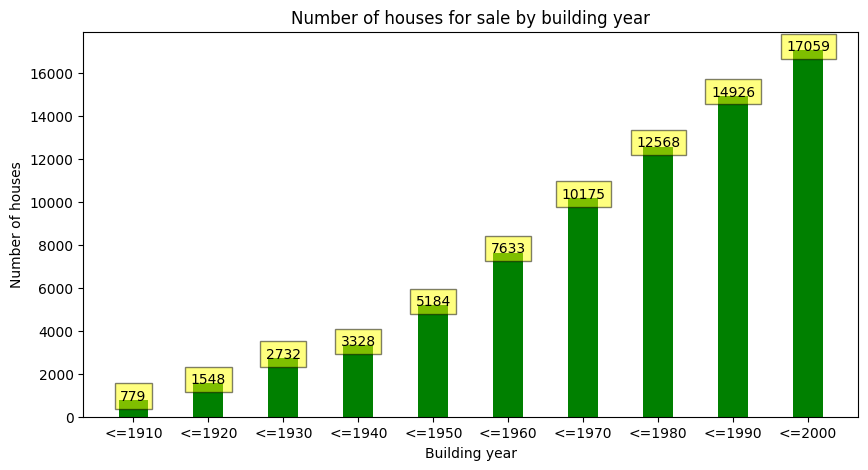

In [204]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center', bbox=dict(facecolor='yellow', alpha=0.5))  # Aligning text at center

plt.figure(figsize=(10, 5))
plt.bar(years_adjusted_for_plot, num_of_houses, width=0.4, color="green")  # years_adjusted_for_plot
add_labels(years_adjusted_for_plot, num_of_houses)                          # years_adjusted_for_plot
plt.title("Number of houses for sale by building year")
plt.xlabel("Building year")
plt.ylabel("Number of houses")
plt.show()

## Looking at historic houses (building year <= 1950)

In [205]:
print(df_houses.query("yr_built <= 1950")["house_id"].count())

5184


In [206]:
df_houses_historical = df_houses.query("yr_built <= 1950")

In [210]:
df_historical_interesting = df_houses_historical[["price", "grade", "condition", "yr_built", "bedrooms", "bathrooms", 
                     "sqft_living", "sqft_lot", "floors", "sqft_living15", "sqft_lot15", "sqft_above"]]

In [211]:
df_historical_interesting.shape

(5184, 12)

In [213]:
corr_historical = df_historical_interesting.corr()

<Axes: >

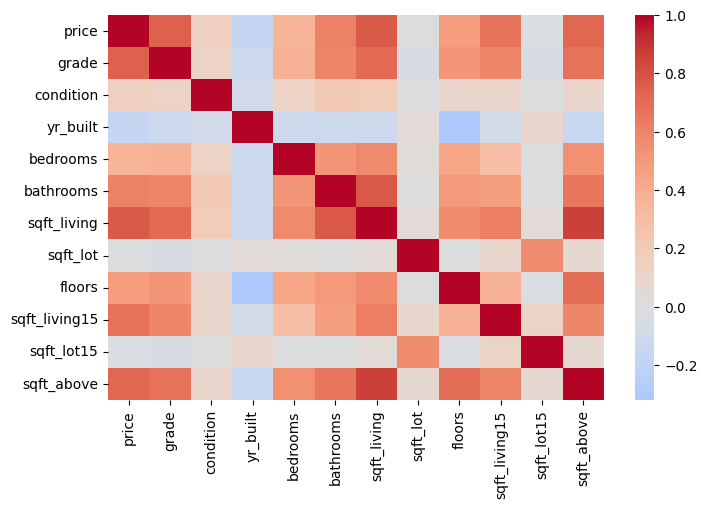

In [214]:
sns.heatmap(corr_historical,cmap='coolwarm', center=0)

### Correlation coefficients

In [215]:
print(df_houses_historical["sqft_living15"].corr(df_houses_historical["price"]))

0.6739964299752489


### Geographic plots

In [218]:
df_houses_historical_counts = df_houses_historical['zipcode'].value_counts().reset_index()
df_houses_historical_counts.columns = ['zipcode', 'House_counts']

In [220]:
fig = px.choropleth_mapbox(
    df_houses_historical_counts,
    locations='zipcode',
    geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
    featureidkey='properties.ZCTA5CE10',
    color='House_counts',
    mapbox_style='open-street-map',
    color_continuous_scale="Sunsetdark",   # Sunset, Purp, dense, speed
    center={"lat": df_houses_historical['lat'].mean(), "lon": df_houses_historical['long'].mean()},
    title="Number of historic houses for sale per Zipcode"
)

fig.update_layout(
    autosize=False,
    width=1300,
    height=800,
)

fig.show()

### Looking at the house prices

In [233]:
# no nans
df_houses_historical["price"].isna().sum()

np.int64(0)

In [234]:
df_houses_historical["price"] = df_houses_historical["price"].astype("int64")

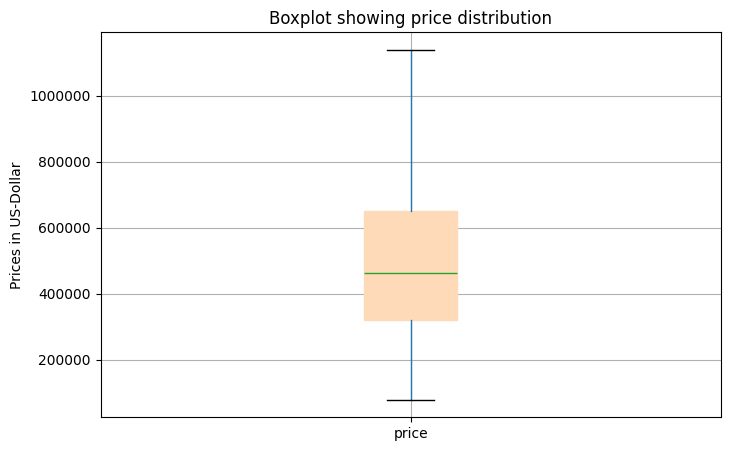

In [235]:
fig, ax1 = plt.subplots()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax1 = df_houses_historical.boxplot(column=['price'], figsize=(15,5), grid=True, showfliers=False, patch_artist=True, boxprops=dict(facecolor="peachpuff", color="peachpuff"))
ax1.set_ylabel('Prices in US-Dollar')
ax1.set_title("Boxplot showing price distribution")
plt.show()

In [819]:
[item.get_ydata()[1] for item in bp['whiskers']]

[np.float64(78000.0), np.float64(1140000.0)]

In [820]:
[item.get_ydata()[1] for item in bp['medians']]

[np.float64(464000.0)]

In [821]:
df_houses_historical["price"].min(), df_houses_historical["price"].max(), df_houses_historical["price"].median(), df_houses_historical["price"].mean()

(np.int64(78000),
 np.int64(7700000),
 np.float64(464000.0),
 np.float64(544129.0194830247))

### Median prices per building year

In [236]:
df_av_prices = df_houses.groupby("yr_built")["price"].median().to_frame()
df_av_prices = df_av_prices.reset_index()
df_av_prices.columns = ["yr_built", "median_price"]

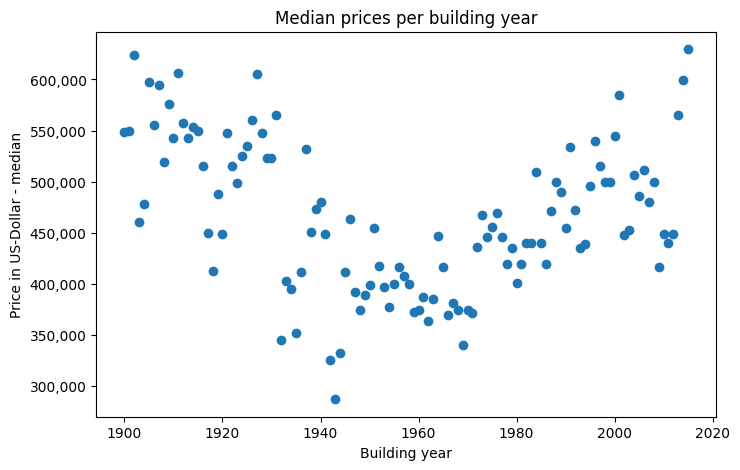

In [239]:
plt.scatter(df_av_prices["yr_built"], df_av_prices["median_price"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("Building year")
plt.ylabel("Price in US-Dollar - median")
plt.title("Median prices per building year")
plt.show()

### Median prices per buidling year for historic houses

In [243]:
df_av_prices_historical = df_houses_historical.groupby("yr_built")["price"].median().to_frame()
df_av_prices_historical = df_av_prices_historical.reset_index()
df_av_prices_historical.columns = ["yr_built", "median_price"]

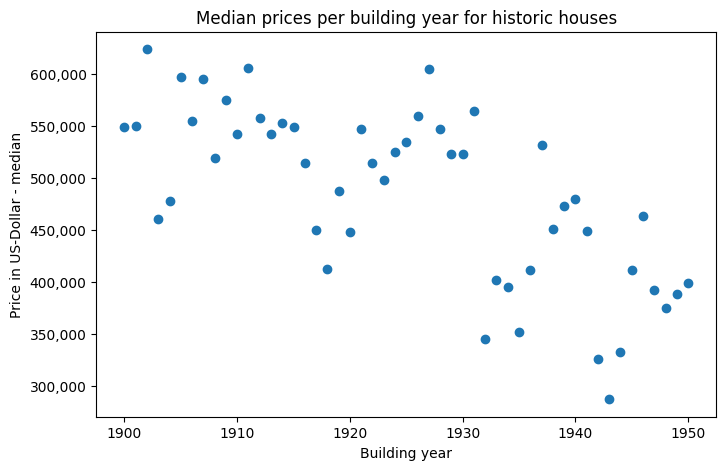

In [245]:
plt.scatter(df_av_prices_historical["yr_built"], df_av_prices_historical["median_price"])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel("Building year")
plt.ylabel("Price in US-Dollar - median")
plt.title("Median prices per building year for historic houses")
plt.show()

In [246]:
df_av_prices_historical["yr_built"].corr(df_av_prices_historical["median_price"], method="pearson")

np.float64(-0.6889436197907399)